In [304]:
using Plots, Revise
include("model.jl")

linReg (generic function with 1 method)

## A. Simulation for Paper Figure

In [344]:
#
b_init = [14.94, 0.06, 0.06, 2]
steps = 500
b_ols, l_ols = run_simulation(survey_generator, update_β_ols, b_init, 500, steps)
b_robust, l_robust = run_simulation(survey_generator, update_β_robust, b_init, 500, steps)


([14.94 0.06 0.06 2.0; 17.9772 0.062216930838872544 0.06414156249375134 2.6205764665733624; … ; 15.3249906151617 0.06004568971133172 0.0766833559008189 4.858695284683574; 14.326892496320747 0.05929651761293449 0.0718680417110536 4.701225227190223], [35.50276160000002, 22.64457005666935, 22.908767282038053, 23.897313837707756, 22.403354197430065, 24.5789232248275, 23.64107191012115, 22.994100620478616, 25.40363974793741, 26.323596532824865  …  22.873350160341626, 22.172038468541327, 22.861188710903523, 22.18175221867104, 23.096224600646647, 22.17924325401689, 19.4145786608173, 22.890337087620786, 20.613832357357378, 20.613832357357378])

In [326]:
mean(l_ols)

28.026219615057848

In [327]:
mean(l_robust)

27.814152848159267

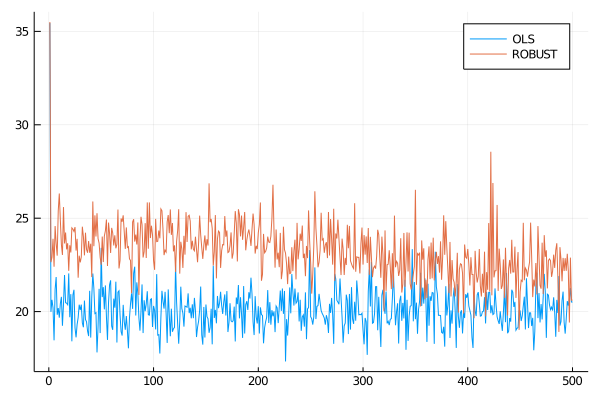

In [345]:
plot([l_ols l_robust], label=["OLS" "ROBUST"])

In [239]:
b_optimal = true_Frankel_estimate()[2] .+ zeros(steps)
#b_optimal = 0.05 .+zeros(steps)
b_none = 0.1 .+zeros(steps)

1000-element Array{Float64,1}:
 0.1
 0.1
 0.1
 0.1
 0.1
 0.1
 0.1
 0.1
 0.1
 0.1
 0.1
 0.1
 0.1
 ⋮
 0.1
 0.1
 0.1
 0.1
 0.1
 0.1
 0.1
 0.1
 0.1
 0.1
 0.1
 0.1

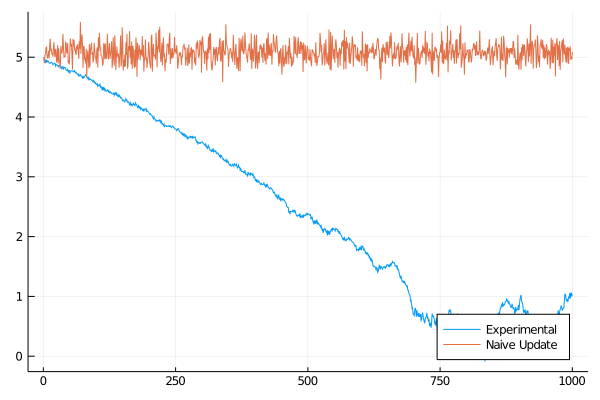

In [332]:
labels = ["Experimental" "Naive Update" "Optimal (FK)" "No Manipulation"]
#plot([ b_robust[:, 2] b_ols[:, 2] b_optimal b_none], legend=:bottomright, label=labels)
plot([ b_robust[:, 4] b_ols[:, 4]], legend=:bottomright, label=labels)
#savefig("figures/test.pdf")
#plot!(b_ols,label=labels)
#plot!(zeros(steps).+b_optimal[2],xlabel="steps",ylabel="\\beta",label=labels)
#plot!(zeros(steps).+1,label=labels)
#

## Simulation for Testing Experiment Convergence

In [324]:
b_ols[1000, :]

4-element Array{Float64,1}:
 14.937525895352545
  0.0569402875542349
  0.05883824767268396
  4.857632062866333

In [ ]:
step = b[2]/5
perturb = rand(Uniform(-1,1),1000).*step
y,x = generate_sample_Frankel(b[2] .+ perturb,1000)
yhat = b[1].+b[2].*x
dhat = localDeriv(x,perturb)
println(mean(dhat))

In [ ]:
println(var(dhat))

0.7162978701990245